In [1]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read in cell annotation file to split case/control samples
cell_anno = pd.read_csv("../../../results/data_preprocessing/Lasry/anno_cells_corr.txt", delimiter="\t")

/tmp/ipykernel_8231/1850601548.py:2: DtypeWarning: Columns (22,26,27,28,29,30,32,33,34,35,36,37,38,41,42,43,44,47,48,50,55,57,58,61,65,67,68,70) have mixed types. Specify dtype option on import or set low_memory=False.
  cell_anno = pd.read_csv("../../../results/data_preprocessing/Lasry/anno_cells_corr.txt", delimiter="\t")


In [4]:
# Create a list of column names in the dataframe that contain the string "healthy"
control = cell_anno[cell_anno["health_status"]=="healthy"].sample_ID.unique()

# Create a list of column names in the dataframe that contain the string "AML"
case = cell_anno[cell_anno["health_status"]=="AML"].sample_ID.unique()


In [6]:
# Read in the CellPhoneDB results CSV file and set the interaction column as the index.
# Any missing values (NaNs) in the dataframe are filled with zeros.
# These missing values are due to merged samples.

cpdb = pd.read_csv('../../../results/method_comparison/compare_algorithms/Lasry/CPDB/CPDB_significant_weights.csv', index_col=None)
cpdb = cpdb.fillna(0)
cpdb.set_index("interaction_ID", inplace=True)
cpdb_anno = pd.read_csv('../../../results/method_comparison/compare_algorithms/Lasry/CPDB/CPDB_anno_interactions.csv', index_col=None)
cpdb_anno.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
# Read in the NicheNet results CSV file and set the interaction column as the index.
# Any missing values (NaNs) in the dataframe are filled with zeros.
# These missing values are due to merged samples.
nnet = pd.read_csv("../../../results/method_comparison/compare_algorithms/Lasry/NicheNet/NicheNet_scores.csv")
nnet_anno = pd.read_csv("../../../results/method_comparison/compare_algorithms/Lasry/NicheNet/NicheNet_anno_interactions.csv")
nnet = nnet.fillna(0)
nnet.set_index("interaction_ID", inplace=True)
nnet_anno.drop("Unnamed: 0", axis=1, inplace=True)

In [9]:
community = pd.read_csv("../../../results/method_comparison/compare_algorithms/Lasry/community/community_weights.csv")
community.rename(columns={"Unnamed: 0": "interaction_ID"}, inplace=True)
community.set_index("interaction_ID", inplace=True)
community_anno = pd.read_csv("../../../results/method_comparison/compare_algorithms/Lasry/community/community_anno_interactions.csv")
community_anno.drop("Unnamed: 0", axis=1, inplace=True)

community_anno_lower_threshold = pd.read_csv("../../../results/method_comparison/compare_algorithms/Lasry/CPDB/CPDB_significant_weights.csv")
community_anno_lower_threshold.drop("Unnamed: 0", axis=1, inplace=True)

# community_zero = pd.read_csv("../../../results/method_comparison/compare_results/community/community_results_0.csv")
# # community_zero.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
good_quality = community_anno[community_anno["passed_QC_filter"]==True]
community_good_quality = community[community.index.isin(good_quality["interaction_ID"])]

In [11]:
significant = community_anno[community_anno["sign"]==True]
community_significant=community[community.index.isin(significant["interaction_ID"])]

In [12]:
significant_lower_threshold = community_anno_lower_threshold[community_anno_lower_threshold["sign"]==True]
community_significant_lower_threshold=community[community.index.isin(significant_lower_threshold["interaction_ID"])]

KeyError: 'sign'

In [13]:
def index_to_list(df):
    return df.index.values.tolist()

In [14]:
# below functions gets the number of non zero interactions in case/control. 
# the input is weight matrix and anno_interactions
def get_nr_samples(df, anno_df):
    mask_healthy = df.loc[:, control] != 0
    row_sums_healthy = np.sum(mask_healthy, axis=1)
    anno_df['nr_nonZero_controls'] = row_sums_healthy.values
    
    mask_case = df.loc[:, case] != 0
    row_sums_case = np.sum(mask_case, axis=1)
    anno_df['nr_nonZero_case'] = row_sums_case.values
    return anno_df

In [15]:
def plot_density(df_anno,title):
    # plot scatter plot
    sns.scatterplot(x=df_anno['nr_nonZero_controls'], y=df_anno['nr_nonZero_case'], s=20, alpha=0.5)

    # add 2D density plot
    sns.kdeplot(x=df_anno['nr_nonZero_controls'], y=df_anno['nr_nonZero_case'], 
                cmap="Blues", shade=True, alpha=0.7)

    # set labels
    plt.xlabel('number of control samples')
    plt.ylabel('number of case samples')
    plt.title(title)

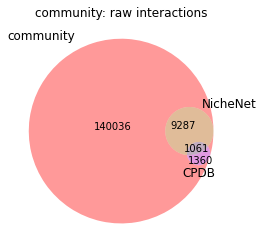

In [16]:
venn3([set(index_to_list(community)), set(index_to_list(nnet)), set(index_to_list(cpdb))], ("community", 'NicheNet', 'CPDB'))
plt.title("community: raw interactions")
plt.savefig('venn_raw_interactions.jpeg', bbox_inches='tight')

In [17]:
community_anno_raw = get_nr_samples(community, community_anno)

/tmp/ipykernel_8231/2058819949.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_anno['nr_nonZero_controls'], y=df_anno['nr_nonZero_case'],


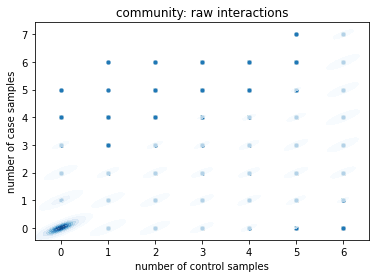

In [18]:
plot_density(community_anno_raw, "community: raw interactions")
plt.savefig('density_community_raw.jpeg', bbox_inches='tight')

In [19]:
nnet_anno = get_nr_samples(nnet, nnet_anno)

/tmp/ipykernel_8231/2058819949.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_anno['nr_nonZero_controls'], y=df_anno['nr_nonZero_case'],


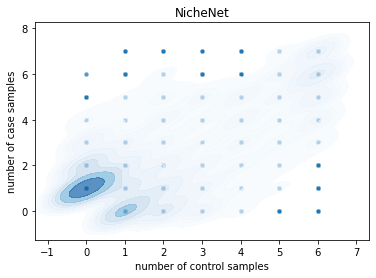

In [20]:
plot_density(nnet_anno, "NicheNet")
plt.savefig('density_NicheNet.jpeg', bbox_inches='tight')

In [21]:
cpdb_anno = get_nr_samples(cpdb, cpdb_anno)

/tmp/ipykernel_8231/2058819949.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_anno['nr_nonZero_controls'], y=df_anno['nr_nonZero_case'],


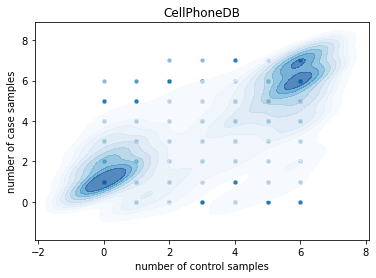

In [22]:
plot_density(cpdb_anno, "CellPhoneDB")
plt.savefig('density_CellPhoneDB.jpeg', bbox_inches='tight')

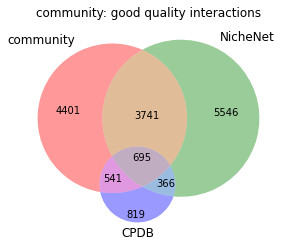

In [23]:
#good quality interactions from community

venn3([set(index_to_list(community_good_quality)), set(index_to_list(nnet)), set(index_to_list(cpdb))], ("community", 'NicheNet', 'CPDB'))
plt.title("community: good quality interactions")
plt.savefig('venn_good_quality.jpeg', bbox_inches='tight')

In [ ]:
community_good_anno = community_anno_raw[community_anno_raw.interaction_ID.isin(index_to_list(community_good_quality))]

In [ ]:
plot_density(community_good_anno, "community: good quality interactions")
plt.savefig('density_good_quality.jpeg', bbox_inches='tight')

In [ ]:
#significant interactions from community
# fig = plt.figure(figsize=(12, 12))
out=venn3([set(index_to_list(community_significant)), set(index_to_list(nnet)), set(index_to_list(cpdb))], ("community", 'NicheNet', 'CPDB'))
for x in out.subset_labels:
    if x:
        x.set_text("")

plt.title("community: differential interactions")
plt.savefig('venn_significant.jpeg', bbox_inches='tight')

In [ ]:
community_significant = community_anno_raw[community_anno_raw.interaction_ID.isin(index_to_list(community_significant))]

In [ ]:
plot_density(community_significant, "community: differential interactions")
plt.savefig('density_significant.jpeg', bbox_inches='tight')

In [ ]:
#significant interactions with lower thresholds

venn2([set(index_to_list(community_significant_lower_threshold)), set(index_to_list(community_significant))], ("lower_sign", 'significant'))
plt.savefig('venn_strict.jpeg', bbox_inches='tight')

In [ ]:
community_strict = community_anno_raw[community_anno_raw.interaction_ID.isin(index_to_list(community_significant_lower_threshold))]

In [ ]:
plot_density(community_strict, "community: differential interactions(strict)")
plt.savefig('density_strict.jpeg', bbox_inches='tight')

In [ ]:
good_q=set(index_to_list(community_good_quality))
nnet_edges=set(index_to_list(nnet))

In [ ]:
dif=nnet_edges.difference(good_q)

In [ ]:
len(set(index_to_list(nnet)).difference(set(index_to_list(community_good_quality))))

In [ ]:
dif_anno=community_anno[community_anno.interaction_ID.isin(dif)]

In [ ]:
failed_log10_cumw=dif_anno[dif_anno["passed_log10_cum_weight_filter"]==False]

In [ ]:
failed_frac_samples=dif_anno[dif_anno["passed_frac_samples_filter"]==False]

In [ ]:
failed_log10_cond=dif_anno[dif_anno["passed_log10_meanexpr_per_condition_filter"]==False]

In [ ]:
failed_frac_samples.head()

In [ ]:
venn3([set(failed_log10_cumw["interaction_ID"]), set(failed_frac_samples["interaction_ID"]), set(failed_log10_cond["interaction_ID"])], ("failed_log10_cumw", 'failed_frac_samples', 'failed_log10_cond'))
plt.savefig('venn_failed_interactions.jpeg', bbox_inches='tight')

In [ ]:
failed_frac_samples.reset_index(inplace=True)

In [ ]:
nnet_frac = nnet[nnet.index.isin(failed_frac_samples["interaction_ID"])]

In [ ]:
nnet_frac

In [ ]:
dif_anno_nnet=nnet_anno[nnet_anno.interaction_ID.isin(nnet_frac.index)]

In [ ]:
nnet_frac

In [ ]:
dif_anno_nnet

In [ ]:
failed_frac_samples=get_nr_samples(nnet_frac, dif_anno_nnet)

In [ ]:
failed_frac_samples["tuple"]=list(zip(failed_frac_samples.nr_nonZero_controls, failed_frac_samples.nr_nonZero_case))

In [ ]:
failed_frac_samples[failed_frac_samples["tuple"]==(0,0)]

In [ ]:
community[community.index.isin(failed_frac_samples.interaction_ID)]

In [ ]:
plot_density(failed_frac_samples,"failed fraction")
plt.savefig('density_failed_interactions.jpeg', bbox_inches='tight')

In [ ]:
# def plot_scatter2(df):
    
    
#     df["tuple"]=list(zip(df.nr_nonZero_controls, df.nr_nonZero_case))
#     df_group=df.groupby('tuple').sum()
    
    
#     x_max = max(df_group['nr_nonZero_controls'])+250
#     y_max = max(df_group['nr_nonZero_case'])+250

#     plt.scatter(x=df_group['nr_nonZero_controls'], y=df_group['nr_nonZero_case'])
#     plt.plot([0, x_max], [0, y_max], color='red')

#     plt.xlabel('nr_nonZero_controls')
#     plt.ylabel('nr_nonZero_cases')
    
    
    

# #     plt.plot([0,4.5], [0,4.5], color='red')
#     plt.xlim(0,x_max)
#     plt.ylim(0,y_max)
    
#     # plt.xscale("log")
#     # plt.yscale("log")

#     # Add diagonal line
#     # log_min_val = min(min(np.log10(nnet_anno_group['nr_nonZero_controls'])), min(np.log10(nnet_anno_group['nr_nonZero_case'])))
#     # log_max_val = max(max(np.log10(nnet_anno_group['nr_nonZero_controls'])), max(np.log10(nnet_anno_group['nr_nonZero_case'])))

#     # transformed_min_val = 10**log_min_val
#     # transformed_max_val = 10**log_max_val

#     # plt.plot([transformed_min_val, transformed_max_val], [transformed_min_val, transformed_max_val], 'r--')


#     plt.show()

In [ ]:
# plot_scatter2(failed_frac_samples)

In [ ]:
# Each column contains a list of two values: the number of interactions in the case group and the control group


plotdata = pd.DataFrame({

    "community":[len(index_to_list(community))],

    "NicheNet":[len(index_to_list(nnet))],

    "CPDB":[len(index_to_list(cpdb))]},

    index=["# of total interactions"])

In [ ]:
plotdata

In [ ]:
plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("comparing raw results")

plt.xlabel("tools")

plt.ylabel("# of interactions")
plt.savefig('barplot_raw_interactions.jpeg', bbox_inches='tight')

In [ ]:
# Each column contains a list of two values: the number of interactions in the case group and the control group


plotcommunity = pd.DataFrame({

    "community_raw":[len(index_to_list(community))],

    "community_good_quality":[len(index_to_list(community_good_quality))],

    "community_significant":[len(index_to_list(community_significant))],
    "community_significant_lower":[len(index_to_list(community_significant_lower_threshold))]},
    

    index=["# of total interactions"])

In [ ]:
plotcommunity

In [ ]:
# plotcommunity.plot(kind="bar",figsize=(15, 8))

# plt.title("comparing raw results")

# plt.xlabel("tools")

# plt.ylabel("# of interactions")

In [ ]:
# failed_frac_samples["tuple"]=list(zip(failed_frac_samples.nr_nonZero_controls, failed_frac_samples.nr_nonZero_case))
# df_group=failed_frac_samples.groupby('tuple').sum()

    
# x_max = max(df_group['nr_nonZero_controls'])+250
# y_max = max(df_group['nr_nonZero_case'])+250

# plt.scatter(x=df_group['nr_nonZero_controls'], y=df_group['nr_nonZero_case'])

# # loop through each point in the plot and add annotations
# for i, row in df_group.iterrows():
#     x = row['nr_nonZero_controls']
#     y = row['nr_nonZero_case']
#     label = f"({i[0]}, {i[1]})"
#     plt.annotate(label, (x, y))
    
# # add the diagonal line
# plt.plot([0, x_max], [0, y_max], color='red')

# # set the x-axis and y-axis limits
# plt.xlim(0, x_max)
# plt.ylim(0, y_max)

# # add x-axis and y-axis labels
# plt.xlabel('nr_nonZero_controls')
# plt.ylabel('nr_nonZero_cases')



# plt.show()